# Making word clouds from Excel file

[wordcloud](http://amueller.github.io/word_cloud/index.html)

You will be prompted to enter vehicle make ("honda" or "acura")

Enter make ( honda|acura ): honda


D:\Miniconda3\envs\jupyter\lib\site-packages\PIL\ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


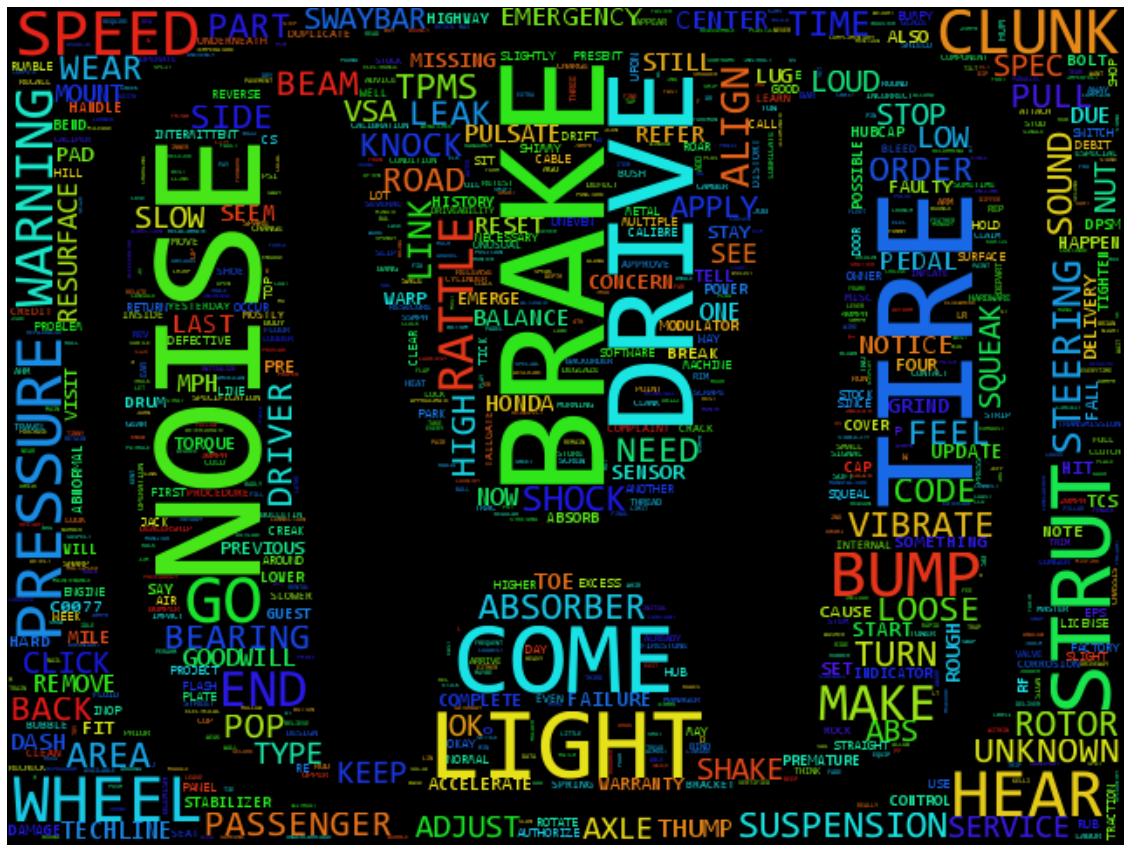

In [1]:
%matplotlib inline
from scipy.misc import imread
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

# Exclude non-value added words that are almost always used in the contention text
STOPWORDS.add('assembly')
STOPWORDS.add('assy')
STOPWORDS.add('customer')
STOPWORDS.add('client')
STOPWORDS.add('correct')
STOPWORDS.add('cust')
STOPWORDS.add('check')
STOPWORDS.add('bad')
STOPWORDS.add('car')
STOPWORDS.add('confirm')
STOPWORDS.add('confirmed')
STOPWORDS.add('diagnose')
STOPWORDS.add('sop')
STOPWORDS.add('replace')
STOPWORDS.add('replaced')
STOPWORDS.add('repl')
STOPWORDS.add('state')
STOPWORDS.add('states')
STOPWORDS.add('report')
STOPWORDS.add('find')
STOPWORDS.add('perform')
STOPWORDS.add('performed')
STOPWORDS.add('checked')
STOPWORDS.add('found')
STOPWORDS.add('advise')
STOPWORDS.add('advised')
STOPWORDS.add('inspect')
STOPWORDS.add('inspected')
STOPWORDS.add('inspection')
STOPWORDS.add('install')
STOPWORDS.add('tech')
STOPWORDS.add('technician')
STOPWORDS.add('new')
STOPWORDS.add('repair')
STOPWORDS.add('test')
STOPWORDS.add('please')
STOPWORDS.add('request')
STOPWORDS.add('per')
STOPWORDS.add('c')
STOPWORDS.add('s')
STOPWORDS.add('vehicle')
STOPWORDS.add('veh')
STOPWORDS.add('verify')
# Below are irrelevant words when using symptom class name
STOPWORDS.add('function')
STOPWORDS.add('issue')
STOPWORDS.add('front')
STOPWORDS.add('rear')
STOPWORDS.add('system')
STOPWORDS.add('left')
STOPWORDS.add('right')
STOPWORDS.add('rr')
STOPWORDS.add('fr')
STOPWORDS.add('unit')

df = pd.read_excel(r'D:\temp\chassis.xlsx', sheetname='Claims')

make = input("Enter make ( honda|acura ): ")

text = ''
for row in df.CUST_CONTENTION_TEXT_ENRICHED.values:
    text = text + str(row) + ' '

# read the proper mask image based on make
if make.lower() == 'honda':
    image_mask = imread(r'D:\jupyter\wordcloud\honda_logo.png')
else:
    image_mask = imread(r'D:\jupyter\wordcloud\acura_logo.png')

wc = WordCloud(max_words=2000, mask=image_mask, background_color='black',
               stopwords=STOPWORDS, collocations=False, font_path=r'C:\Windows\Fonts\consola.ttf')
# generate word cloud
wc.generate(text)

# store to file
#wc.to_file(r'D:\temp\Acura_WordCloud.png')

# show
plt.imshow(wc)
plt.gca().xaxis.set_major_locator(NullLocator())   # remove white space
plt.gca().yaxis.set_major_locator(NullLocator())   # remove white space
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig(r'D:\temp\WordCloud.png', dpi=300, pad_inches=0, bbox_inches='tight')
plt.show()

### If you want to play around with image size, etc, run just this portion:

D:\Miniconda3\envs\jupyter\lib\site-packages\PIL\ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


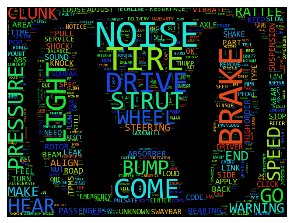

In [25]:
# show
plt.imshow(wc)
plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())
fig = plt.gcf()
fig.set_size_inches(5, 5)
fig.savefig(r'D:\temp\WordCloud.png', dpi=300, pad_inches=0, bbox_inches='tight')
plt.show()

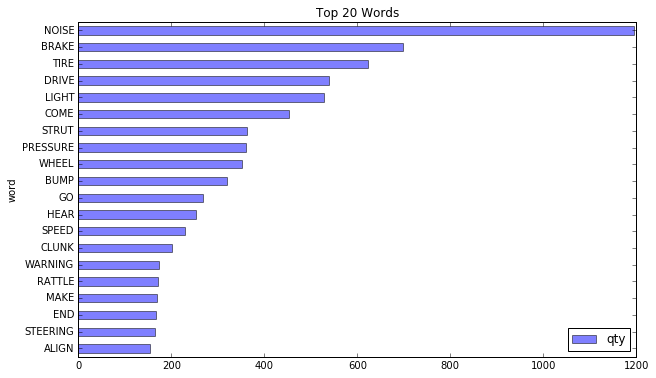

In [2]:
word = []
count = []

for item in wc.process_text(text):
    w, c = item
    word.append(w)
    count.append(c)

word_freq = pd.DataFrame(data={'word':word, 'qty':count})

top_x = 20
word_freq.sort_values(by='qty', ascending=False)[:top_x].set_index('word').sort_values(by='qty').plot.barh(alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Top " +str(top_x) + " Words")
plt.show()

### Top 50 Words

In [4]:
word_freq[['word','qty']].sort_values(by='qty', ascending=False)[:50]

word   qty
1809       NOISE  1196
1618       BRAKE   699
285         TIRE   622
1266       DRIVE   539
500        LIGHT   528
70          COME   453
8          STRUT   363
666     PRESSURE   361
584        WHEEL   351
95          BUMP   320
1074          GO   268
1696        HEAR   254
145        SPEED   230
836        CLUNK   202
935      WARNING   173
1162      RATTLE   172
1591        MAKE   170
1476         END   167
590     STEERING   165
1599       ALIGN   154
1823  SUSPENSION   152
1557        TURN   143
1799       SOUND   138
294      VIBRATE   138
1378       ROTOR   134
688         TIME   124
692         AREA   123
127     ABSORBER   120
1060        TPMS   120
1327       SHOCK   120
1803   PASSENGER   100
1336        PULL    97
572         LINK    91
714        KNOCK    89
232        LOOSE    87
99         ORDER    87
1820        SIDE    86
88          PART    82
1480         POP    82
1735        BACK    78
346         LEAK    78
1242        ROAD    77
1406        FEEL    74
1216        BEAM    73
267      BEARING    72
566      UNKNOWN    71
1786        WEAR    71
832         HIGH    69
1759        NEED    67
1222      DRIVER    66